# Brain Tumor Detection: A Convolutional Neural Network Solution

## Imports

In [21]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Problem Statement

Can a CNN be used to predict the presence of a brain tumor in MRI brain scans more accurately than a baseline score of 50%.

## Data Processing and EDA

Because this data is exclusively images, a visual inspection was done to ensure the integrity of the files. Other than that any files that were corrupt or unable to be parsed into 2d arrays would have thrown an exception in the following code.

In [2]:
#Process Images for Tumors

tumor_array = []

tumor_path = 'Data/yes/'

#Convert images into arrays
for file in os.listdir(tumor_path):
    try:
#Resize all images for data homogeniety 
        tumor = load_img(tumor_path + file, target_size=(256, 256))
        tumor_arr = img_to_array(tumor) / 255
        tumor_array.append(tumor_arr)
    except:
        print(f'Error for file: {file}')

print(f'{len(tumor_array)} pictures converted.')

1500 pictures converted.


In [3]:
#Process Images for Healthy

healthy_array = []

healthy_path = 'Data/no/'

#Convert images into arrays
for file in os.listdir(healthy_path):
    try:
#Resize all images for data homogeniety         
        healthy = load_img(healthy_path + file, target_size=(256, 256))
        healthy_arr = img_to_array(healthy) / 255
        healthy_array.append(healthy_arr)
    except:
        print(f'Error for file: {file}')

print(f'{len(healthy_array)} pictures converted.')


1500 pictures converted.


In [4]:
#create arrays of arrays to house binary classifications

X = tumor_array + healthy_array

X_arr = np.array(X)
print(f'X shape: {X_arr.shape}')

# 1 for healthy, 0 for tumor
y = [1] * 1500 + [0] * 1500
# convert to array and check shape
y = np.array(y)
print(f'y shape: {y.shape}')

X shape: (3000, 256, 256, 3)
y shape: (3000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [6]:
X_train = np.array(X_train)

In [7]:
X_test = np.array(X_test)

In [8]:
X_train.shape

(2250, 256, 256, 3)

In [9]:
y_train.shape

(2250,)

In [10]:
X_test.shape

(750, 256, 256, 3)

In [11]:
y_test.shape

(750,)

## Model Training and Validation

In [26]:
#Creating a sequential Neural Net utilizing relu activation layers and a sigmoid output layer 
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another:
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
#Callback
early_stop = EarlyStopping(monitor= 'val_loss', min_delta = 0, patience = 5, verbose = 1, mode = 'auto')

In [27]:
h = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=20, callbacks=[early_stop])

Epoch 1/20
36/36 [==============================] - 96s 3s/step - loss: 0.6705 - accuracy: 0.7698 - val_loss: 0.3193 - val_accuracy: 0.8573
Epoch 2/20
36/36 [==============================] - 96s 3s/step - loss: 0.2029 - accuracy: 0.9280 - val_loss: 0.1682 - val_accuracy: 0.9413
Epoch 3/20
36/36 [==============================] - 96s 3s/step - loss: 0.0688 - accuracy: 0.9800 - val_loss: 0.0963 - val_accuracy: 0.9773
Epoch 4/20
36/36 [==============================] - 96s 3s/step - loss: 0.0244 - accuracy: 0.9951 - val_loss: 0.0896 - val_accuracy: 0.9787
Epoch 5/20
36/36 [==============================] - 96s 3s/step - loss: 0.0047 - accuracy: 0.9996 - val_loss: 0.1002 - val_accuracy: 0.9827
Epoch 6/20
36/36 [==============================] - 96s 3s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 0.9813
Epoch 7/20
36/36 [==============================] - 96s 3s/step - loss: 5.6762e-04 - accuracy: 1.0000 - val_loss: 0.1203 - val_accuracy: 0.9813
Epoch 8/20
36/36

As you can see above, the validation accuracy far exceeds a baseline of .50

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                15745088  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

C:\Users\marka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


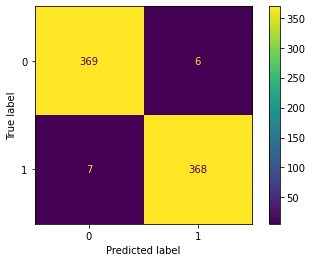

In [28]:
y_pred_class = model.predict_classes(X_test)

# confusion matrix 
cm=confusion_matrix(y_test,y_pred_class)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

## Processing Prediction (For Use in Streamlit App)

In [72]:
#Process Images for Preds

pred_array = []

pred_path = 'Data/pred/'

#Convert images into arrays
for file in os.listdir(pred_path):
    try:
#Resize all images for data homogeniety         
        pred = load_img(pred_path + file, target_size=(256, 256))
        pred_arr = img_to_array(pred) / 255
        pred_array.append(pred_arr)
    except:
        print(f'Error for file: {file}')

print(f'{len(pred_array)} pictures converted.')

60 pictures converted.


In [76]:
X = np.array(pred_array)
print(X.shape)

(60, 256, 256, 3)


In [77]:
model.predict_classes(X)

C:\Users\marka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

## Saving and Exporting Model

In [63]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets
